# Part II: Clustering analysis

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', 50)
import plotly.express as px

In [54]:
# importing some columns of the data_final csv file

cluster_data = pd.read_csv('Data/data_final.csv')
cluster_data

,order_id,user_id,eval_set,product_id,product_name,add_to_cart_order,reordered,aisle_id,aisle,department_id,department,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,202279,prior,33120,Organic Egg Whites,1,1,86,eggs,16,dairy eggs,3,5,9,8.0
1,26,153404,prior,33120,Organic Egg Whites,5,0,86,eggs,16,dairy eggs,2,0,16,7.0
2,120,23750,prior,33120,Organic Egg Whites,13,0,86,eggs,16,dairy eggs,11,6,8,10.0
3,327,58707,prior,33120,Organic Egg Whites,5,1,86,eggs,16,dairy eggs,21,6,9,8.0
4,390,166654,prior,33120,Organic Egg Whites,28,1,86,eggs,16,dairy eggs,48,0,12,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,3243156,166400,prior,20731,Straight Sherry,1,0,134,specialty wines champagnes,5,alcohol,3,1,13,12.0
32434485,860862,104017,prior,30582,Natural Champagne,1,0,134,specialty wines champagnes,5,alcohol,13,5,14,18.0
32434486,1333472,62079,prior,27906,Imperial Champagne,1,0,134,specialty wines champagnes,5,alcohol,10,3,10,10.0
32434487,2122701,77799,prior,26086,La Grand Dame Brut Champagne,1,1,134,specialty wines champagnes,5,alcohol,2,3,14,3.0


In [3]:
# creating a dataframe with all the purchases made by each user

crosstab_df = pd.crosstab(cluster_data['user_id'], cluster_data['department'])
crosstab_df.head()

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,13,3,0,0,13,0,0,0,2,0,0,0,0,1,0,0,5,22
2,0,0,2,9,3,0,1,48,21,0,17,0,3,1,0,0,11,1,0,36,42
3,0,0,0,3,0,0,0,21,2,4,6,1,0,0,0,0,4,0,0,38,9
4,2,0,2,3,0,0,1,0,2,0,3,2,0,0,0,0,0,0,0,2,1
5,0,0,0,0,0,0,1,8,1,1,2,0,2,0,0,0,2,0,0,19,1


In [4]:
# taking a look at the shape of the dataframe
crosstab_df.shape

(206209, 21)

In [5]:
# checking for missing values
null_cols = crosstab_df.isnull().sum()
null_cols[null_cols > 0]

Series([], dtype: int64)

In [6]:
# taking a look at the variables types
crosstab_df.dtypes

department
alcohol            int64
babies             int64
bakery             int64
beverages          int64
breakfast          int64
bulk               int64
canned goods       int64
dairy eggs         int64
deli               int64
dry goods pasta    int64
frozen             int64
household          int64
international      int64
meat seafood       int64
missing            int64
other              int64
pantry             int64
personal care      int64
pets               int64
produce            int64
snacks             int64
dtype: object

In [7]:
# scaling the features before applying PCA

scaler = StandardScaler()

customers_scale = scaler.fit_transform(crosstab_df)
customers_scale

array([[-0.12392843, -0.17834965, -0.50519566, ..., -0.10758197,
        -0.57626782,  0.2934807 ],
       [-0.12392843, -0.17834965, -0.32814426, ..., -0.10758197,
        -0.14022702,  1.02746008],
       [-0.12392843, -0.17834965, -0.50519566, ..., -0.10758197,
        -0.11209536, -0.1836059 ],
       ...,
       [-0.12392843, -0.0915702 , -0.23961856, ..., -0.10758197,
         0.05669463,  0.33017967],
       [-0.12392843,  0.08198869,  4.9833977 , ..., -0.10758197,
         2.12437196,  1.65134255],
       [-0.12392843, -0.17834965,  0.29153563, ..., -0.10758197,
        -0.37934617, -0.11020796]])

In [8]:
customers_scale.shape

(206209, 21)

In [9]:
# checking if the normalized data has a mean of zero and a standard deviation of on

np.mean(customers_scale),np.std(customers_scale)

(1.0555452221832091e-17, 0.9999999999999998)

In [10]:
# convert the normalized features into a tabular format with a DataFrame

normalised_df = pd.DataFrame(customers_scale,columns=crosstab_df.columns)
normalised_df.head()

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
0,-0.123928,-0.17835,-0.505196,-0.001818,-0.053838,-0.138317,-0.536076,-0.317000,-0.489630,-0.524789,-0.578266,-0.179206,-0.397207,-0.490147,-0.239581,-0.177328,-0.57721,-0.408413,-0.107582,-0.576268,0.293481
1,-0.123928,-0.17835,-0.328144,-0.161132,-0.053838,-0.138317,-0.432576,0.520044,1.527293,-0.524789,0.328152,-0.405745,0.515403,-0.347576,-0.239581,-0.177328,0.13579,-0.220057,-0.107582,-0.140227,1.027460
2,-0.123928,-0.17835,-0.505196,-0.400103,-0.420069,-0.138317,-0.536076,-0.125676,-0.297542,-0.025307,-0.258354,-0.292475,-0.397207,-0.490147,-0.239581,-0.177328,-0.36331,-0.408413,-0.107582,-0.112095,-0.183606
3,0.208613,-0.17835,-0.328144,-0.400103,-0.420069,-0.138317,-0.432576,-0.627903,-0.297542,-0.524789,-0.418310,-0.179206,-0.397207,-0.490147,-0.239581,-0.177328,-0.64851,-0.408413,-0.107582,-0.618465,-0.477198
4,-0.123928,-0.17835,-0.505196,-0.519589,-0.420069,-0.138317,-0.432576,-0.436578,-0.393586,-0.399918,-0.471628,-0.405745,0.211200,-0.490147,-0.239581,-0.177328,-0.50591,-0.408413,-0.107582,-0.379346,-0.477198


In [11]:
normalised_df.shape

(206209, 21)

In [12]:
# applying the Principal Component Analysis algorithm to reduce the number of features to 4

pca_normalised_df = PCA(n_components=4)
principalComponents_normalised = pca_normalised_df.fit_transform(customers_scale)

In [13]:
# creating a DataFrame with the principal component values

principal_df = pd.DataFrame(data = principalComponents_normalised, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
principal_df.head()

,PC1,PC2,PC3,PC4
0,-1.461834,0.254702,0.665201,-0.081333
1,0.346684,-0.367955,0.946740,0.071057
2,-1.248428,-0.241013,0.092798,-0.066548
3,-1.789206,0.101294,0.018503,0.157440
4,-1.616704,-0.303917,-0.149427,0.028962


In [14]:
principal_df.shape

(206209, 4)

In [15]:
print('Explained variation per principal component: {}'.format(pca_normalised_df.explained_variance_ratio_))
print('Sum Explained variation:', pca_normalised_df.explained_variance_ratio_.sum())
print('Percentage of information lost:', (1-pca_normalised_df.explained_variance_ratio_.sum()))

Explained variation per principal component: [0.33790792 0.0701508  0.05474518 0.04883238]
Sum Explained variation: 0.5116362777324239
Percentage of information lost: 0.4883637222675761


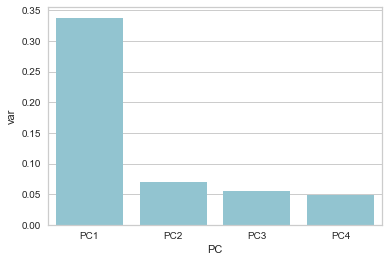

In [16]:
# scree plot

pca_variance = pd.DataFrame({'var':pca_normalised_df.explained_variance_ratio_, 'PC':['PC1','PC2','PC3','PC4']})

sns.barplot(x='PC',y="var", data=pca_variance, color="c")

In [17]:
# creating 3 clusters using k-means clustering

kmeans = KMeans(n_clusters=3).fit(principal_df)

In [18]:
# checking the cluster labels

cluster_labels = kmeans.labels_
cluster_labels

array([1, 1, 1, ..., 2, 0, 1])

In [19]:
# computing the size of each cluster

unique, counts = np.unique(cluster_labels, return_counts=True)

clusters_count = dict(zip(unique, counts))
clusters_count

{0: 8113, 1: 160673, 2: 37423}

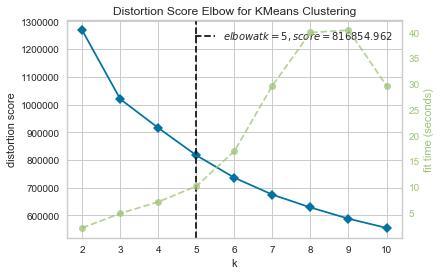

In [22]:
# Finding the optimal number of clusters using Elbow testing 

model = KMeans()
visualizer = KElbowVisualizer(kmeans)
visualizer.fit(principal_df)
visualizer.poof()

In [20]:
# adding the labels of customers to the dataframe

principal_df['labels'] = cluster_labels

In [21]:
principal_df

,PC1,PC2,PC3,PC4,labels
0,-1.461834,0.254702,0.665201,-0.081333,1
1,0.346684,-0.367955,0.946740,0.071057,1
2,-1.248428,-0.241013,0.092798,-0.066548,1
3,-1.789206,0.101294,0.018503,0.157440,1
4,-1.616704,-0.303917,-0.149427,0.028962,1
...,...,...,...,...,...
206204,-1.641984,-0.179342,0.205352,-0.116057,1
206205,1.915950,1.506921,-0.316127,-0.200051,2
206206,0.787951,-0.692121,0.037875,-0.025429,2
206207,6.801032,-1.399319,0.985551,-0.352578,0


In [22]:
# checking the unique values of column labels

principal_df['labels'].unique()

array([1, 2, 0], dtype=int64)

In [23]:
# checking the number of rows in each cluster
principal_df['labels'].value_counts()

1    160673
2     37423
0      8113
Name: labels, dtype: int64

In [24]:
# analysing the differences between clusters

principal_df.groupby('labels').mean()

,PC1,PC2,PC3,PC4
labels,,,,
0,9.728123,-0.183664,0.078689,-0.038659
1,-1.080583,-0.006027,0.015073,-0.003895
2,2.530431,0.065695,-0.081775,0.025103


In [26]:
# find the centers of the three clusters

cluster_pc1_pc2 = pd.DataFrame(principal_df[['PC1','PC2']])
clusterer = KMeans(n_clusters=3,random_state=42).fit(cluster_pc1_pc2)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(cluster_pc1_pc2)
print(centers)

[[-1.07309901e+00 -5.70890621e-03]
 [ 2.57910720e+00  6.29080934e-02]
 [ 9.80344765e+00 -1.76370668e-01]]


# Analysis of the clusters

In [28]:
# adding the labels of customers clusters to the original dataframe

crosstab_df['Cluster'] = cluster_labels
crosstab_df.head()

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks,Cluster
user_id,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,13,3,0,0,13,0,0,0,2,0,0,0,0,1,0,0,5,22,1
2,0,0,2,9,3,0,1,48,21,0,17,0,3,1,0,0,11,1,0,36,42,1
3,0,0,0,3,0,0,0,21,2,4,6,1,0,0,0,0,4,0,0,38,9,1
4,2,0,2,3,0,0,1,0,2,0,3,2,0,0,0,0,0,0,0,2,1,1
5,0,0,0,0,0,0,1,8,1,1,2,0,2,0,0,0,2,0,0,19,1,1


In [29]:
crosstab_df.shape

(206209, 22)

In [42]:
crosstab_df['Cluster'].value_counts()

1    160673
2     37423
0      8113
Name: Cluster, dtype: int64

In [30]:
crosstab_df_cluster = crosstab_df.groupby(['Cluster']).mean()
crosstab_df_cluster

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
Cluster,,,,,,,,,,,,,,,,,,,,,
0,1.803525,17.800567,36.823740,65.304203,21.880069,1.161223,30.147294,152.982127,31.067916,25.850117,58.692962,17.963885,7.965734,19.331443,1.614323,0.933563,50.249846,10.718353,2.463823,246.037347,84.182053
1,0.546171,0.656190,2.506899,6.889496,1.549831,0.069645,2.390439,12.187163,2.319338,1.865012,5.295264,1.862653,0.576432,1.612486,0.170919,0.084227,4.409166,1.100496,0.220516,22.835056,6.596871
2,1.371055,4.648318,12.699276,28.147396,7.563263,0.373086,11.741282,59.180825,11.397803,9.546215,24.301900,7.846699,2.993079,7.829730,0.763862,0.405740,20.294097,4.899260,1.130428,101.921626,30.586591


In [31]:
# transpose function

crosstab_df_transpose = crosstab_df_cluster.transpose()

In [32]:
crosstab_df_transpose.head()

Cluster,0,1,2
department,,,
alcohol,1.803525,0.546171,1.371055
babies,17.800567,0.656190,4.648318
bakery,36.823740,2.506899,12.699276
beverages,65.304203,6.889496,28.147396
breakfast,21.880069,1.549831,7.563263


In [33]:
crosstab_df_transpose = crosstab_df_transpose.rename(columns={0:'Cluster 1',
                                                              1:'Cluster 2',
                                                              2:'Cluster 3'})
crosstab_df_transpose

Cluster,Cluster 1,Cluster 2,Cluster 3
department,,,
alcohol,1.803525,0.546171,1.371055
babies,17.800567,0.656190,4.648318
bakery,36.823740,2.506899,12.699276
beverages,65.304203,6.889496,28.147396
breakfast,21.880069,1.549831,7.563263
bulk,1.161223,0.069645,0.373086
canned goods,30.147294,2.390439,11.741282
dairy eggs,152.982127,12.187163,59.180825
deli,31.067916,2.319338,11.397803


In [34]:
# Cluster 1

cluster1 = crosstab_df_transpose['Cluster 1'].sort_values(ascending=False)
cluster1.head()

department
produce       246.037347
dairy eggs    152.982127
snacks         84.182053
beverages      65.304203
frozen         58.692962
Name: Cluster 1, dtype: float64

In [35]:
# Cluster 2

cluster2 = crosstab_df_transpose['Cluster 2'].sort_values(ascending=False)
cluster2.head()

department
produce       22.835056
dairy eggs    12.187163
beverages      6.889496
snacks         6.596871
frozen         5.295264
Name: Cluster 2, dtype: float64

In [36]:
# Cluster 3

cluster3 = crosstab_df_transpose['Cluster 3'].sort_values(ascending=False)
cluster3.head()

department
produce       101.921626
dairy eggs     59.180825
snacks         30.586591
beverages      28.147396
frozen         24.301900
Name: Cluster 3, dtype: float64

In [37]:
crosstab_cluster_sum = crosstab_df.groupby(['Cluster']).sum()
crosstab_cluster_sum_transpose = crosstab_cluster_sum.transpose()
crosstab_cluster_sum_transpose = crosstab_cluster_sum_transpose.rename(columns={0:'Cluster 1',1:'Cluster 2', 2:'Cluster 3'})
crosstab_cluster_sum_transpose

Cluster,Cluster 1,Cluster 2,Cluster 3
department,,,
alcohol,14632,87755,51309
babies,144416,105432,173954
bakery,298751,402791,475245
beverages,529813,1106956,1053360
breakfast,177513,249016,283040
bulk,9421,11190,13962
canned goods,244585,384079,439394
dairy eggs,1241144,1958148,2214724
deli,252054,372655,426540


In [38]:
crosstab_cluster_sum_transpose.sum()

Cluster
Cluster 1     7179795
Cluster 2    12170059
Cluster 3    13084635
dtype: int64

In [39]:
total_orders = crosstab_cluster_sum_transpose.values.sum()
total_orders

32434489

In [41]:
print("Percentage of orders cluster 1:", round((crosstab_cluster_sum_transpose['Cluster 1'].sum()/total_orders)*100, 2), "%")
print("Percentage of orders cluster 2:", round((crosstab_cluster_sum_transpose['Cluster 2'].sum()/total_orders)*100, 2), "%")
print("Percentage of orders cluster 3:", round((crosstab_cluster_sum_transpose['Cluster 3'].sum()/total_orders)*100, 2), "%")


Percentage of orders cluster 1: 22.14 %
Percentage of orders cluster 2: 37.52 %
Percentage of orders cluster 3: 40.34 %


In [43]:
# calculating the percentages

crosstab_cluster_sum_transpose['Cluster 1 (%)'] = round((crosstab_cluster_sum_transpose['Cluster 1'] / crosstab_cluster_sum_transpose['Cluster 1'].sum())*100,2)
crosstab_cluster_sum_transpose['Cluster 2 (%)'] = round((crosstab_cluster_sum_transpose['Cluster 2'] / crosstab_cluster_sum_transpose['Cluster 2'].sum())*100,2)
crosstab_cluster_sum_transpose['Cluster 3 (%)'] = round((crosstab_cluster_sum_transpose['Cluster 3'] / crosstab_cluster_sum_transpose['Cluster 3'].sum())*100,2)


In [44]:
crosstab_cluster_sum_transpose

Cluster,Cluster 1,Cluster 2,Cluster 3,Cluster 1 (%),Cluster 2 (%),Cluster 3 (%)
department,,,,,,
alcohol,14632,87755,51309,0.20,0.72,0.39
babies,144416,105432,173954,2.01,0.87,1.33
bakery,298751,402791,475245,4.16,3.31,3.63
beverages,529813,1106956,1053360,7.38,9.10,8.05
breakfast,177513,249016,283040,2.47,2.05,2.16
bulk,9421,11190,13962,0.13,0.09,0.11
canned goods,244585,384079,439394,3.41,3.16,3.36
dairy eggs,1241144,1958148,2214724,17.29,16.09,16.93
deli,252054,372655,426540,3.51,3.06,3.26


In [45]:
crosstab_cluster_sum_transpose.sum()

Cluster
Cluster 1         7179795.00
Cluster 2        12170059.00
Cluster 3        13084635.00
Cluster 1 (%)          99.99
Cluster 2 (%)         100.01
Cluster 3 (%)         100.00
dtype: float64

In [46]:
# Cluster 1

cluster1_percentage = crosstab_cluster_sum_transpose['Cluster 1 (%)'].sort_values(ascending=False)
cluster1_percentage.head()

department
produce       27.80
dairy eggs    17.29
snacks         9.51
beverages      7.38
frozen         6.63
Name: Cluster 1 (%), dtype: float64

In [47]:
# Cluster 2

cluster2_percentage = crosstab_cluster_sum_transpose['Cluster 2 (%)'].sort_values(ascending=False)
cluster2_percentage.head()

department
produce       30.15
dairy eggs    16.09
beverages      9.10
snacks         8.71
frozen         6.99
Name: Cluster 2 (%), dtype: float64

In [48]:
# Cluster 3

cluster3_percentage = crosstab_cluster_sum_transpose['Cluster 3 (%)'].sort_values(ascending=False)
cluster3_percentage.head()

department
produce       29.15
dairy eggs    16.93
snacks         8.75
beverages      8.05
frozen         6.95
Name: Cluster 3 (%), dtype: float64

In [49]:
# creating a new dataframe to compare the percentages within each cluster

crosstab_cluster_sum_transpose2 = crosstab_cluster_sum_transpose[['Cluster 1', 'Cluster 2', 'Cluster 3']]

crosstab_cluster_sum_transpose2['Sum'] = crosstab_cluster_sum_transpose2['Cluster 1'] + crosstab_cluster_sum_transpose2['Cluster 2'] + crosstab_cluster_sum_transpose2['Cluster 3']

C:\Users\mafal.MIGUELFRAGOSO\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
crosstab_cluster_sum_transpose2

Cluster,Cluster 1,Cluster 2,Cluster 3,Sum
department,,,,
alcohol,14632,87755,51309,153696
babies,144416,105432,173954,423802
bakery,298751,402791,475245,1176787
beverages,529813,1106956,1053360,2690129
breakfast,177513,249016,283040,709569
bulk,9421,11190,13962,34573
canned goods,244585,384079,439394,1068058
dairy eggs,1241144,1958148,2214724,5414016
deli,252054,372655,426540,1051249


In [51]:
crosstab_cluster_sum_transpose2.sum()

Cluster
Cluster 1     7179795
Cluster 2    12170059
Cluster 3    13084635
Sum          32434489
dtype: int64

In [52]:
# calculating the percentages within each department

crosstab_cluster_sum_transpose2['Cluster 1 (%)'] = round((crosstab_cluster_sum_transpose2['Cluster 1'] / crosstab_cluster_sum_transpose2['Sum'])*100,2)
crosstab_cluster_sum_transpose2['Cluster 2 (%)'] = round((crosstab_cluster_sum_transpose2['Cluster 2'] / crosstab_cluster_sum_transpose2['Sum'])*100,2)
crosstab_cluster_sum_transpose2['Cluster 3 (%)'] = round((crosstab_cluster_sum_transpose2['Cluster 3'] / crosstab_cluster_sum_transpose2['Sum'])*100,2)



C:\Users\mafal.MIGUELFRAGOSO\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
crosstab_cluster_sum_transpose2

Cluster,Cluster 1,Cluster 2,Cluster 3,Sum,Cluster 1 (%),Cluster 2 (%),Cluster 3 (%)
department,,,,,,,
alcohol,14632,87755,51309,153696,9.52,57.10,33.38
babies,144416,105432,173954,423802,34.08,24.88,41.05
bakery,298751,402791,475245,1176787,25.39,34.23,40.38
beverages,529813,1106956,1053360,2690129,19.69,41.15,39.16
breakfast,177513,249016,283040,709569,25.02,35.09,39.89
bulk,9421,11190,13962,34573,27.25,32.37,40.38
canned goods,244585,384079,439394,1068058,22.90,35.96,41.14
dairy eggs,1241144,1958148,2214724,5414016,22.92,36.17,40.91
deli,252054,372655,426540,1051249,23.98,35.45,40.57


In [55]:
users_df = (cluster_data.groupby(['user_id'],as_index=False)
         .agg({'order_id':'count', 'order_dow':'mean', 'order_hour_of_day':'mean', 'days_since_prior_order':'mean'})
         .rename(columns={'order_id':'total_orders', 'order_dow':'day_avg', 'order_hour_of_day':'hour_avg', 'days_since_prior_order':'days_since_prior_order_avg'}))


In [60]:
users_df['cluster'] = cluster_labels

In [61]:
users_df

,user_id,total_orders,day_avg,hour_avg,days_since_prior_order_avg,cluster
0,1,59,2.644068,10.542373,20.259259,1
1,2,195,2.005128,10.441026,15.967033,1
2,3,88,1.011364,16.352273,11.487179,1
3,4,18,4.722222,13.111111,15.357143,1
4,5,37,1.621622,15.729730,14.500000,1
...,...,...,...,...,...,...
206204,206205,32,3.718750,13.625000,20.666667,1
206205,206206,285,2.312281,16.796491,4.042705,2
206206,206207,223,2.896861,13.130045,14.879397,2
206207,206208,677,2.760709,13.968981,7.442105,0


In [64]:
users_df['cluster'].value_counts()

1    160673
2     37423
0      8113
Name: cluster, dtype: int64

In [63]:
users_df_cluster = (users_df.groupby(['cluster'],as_index=False)
                    .agg({'total_orders':'mean', 'day_avg':'mean', 'hour_avg':'mean', 'days_since_prior_order_avg':'mean', 'user_id':'count'}))
users_df_cluster.head()

#user_id corresponds to the sum of users in each cluster

,cluster,total_orders,day_avg,hour_avg,days_since_prior_order_avg,user_id
0,0,884.974116,2.757724,13.240716,6.952956,8113
1,1,75.744269,2.751013,13.580670,16.956286,160673
2,2,349.641531,2.744276,13.464712,10.933343,37423


In [65]:
users_df_cluster = (users_df.groupby(['cluster'],as_index=False)
                    .agg({'total_orders':'sum', 'day_avg':'mean', 'hour_avg':'mean', 'days_since_prior_order_avg':'mean', 'user_id':'count'}))
users_df_cluster.head()

#user_id corresponds to the sum of users in each cluster

,cluster,total_orders,day_avg,hour_avg,days_since_prior_order_avg,user_id
0,0,7179795,2.757724,13.240716,6.952956,8113
1,1,12170059,2.751013,13.580670,16.956286,160673
2,2,13084635,2.744276,13.464712,10.933343,37423
